In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
### Config
MEAN_CHORD      = 250           * 1e-3  # mm
WINGSPAN        = 1400          * 1e-3  # mm
WING_AREA       = WINGSPAN*MEAN_CHORD
ASPECT_RATIO    = WINGSPAN/MEAN_CHORD

In [27]:
### Tail config
lt              = 650           * 1e-3  # mm
tail_chord      = 150           * 1e-3  # mm
tail_span       = 300           * 1e-3  # mm
tail_area       = tail_chord*tail_span  # m**2

hac = 62.5                      * 1e-3  # mm
hcg = 187.5                     * 1e-3  # mm

_,_,cl_t,cd_t,cm_t = np.load('naca9.npy',allow_pickle=True)
alpha,_,cl_w,cd_w,cm_w = np.load('..\\Aerodynamics\\tkv2008_analysis_3.npy',allow_pickle=True)

cl_w = cl_w[:,15]
cd_w = cd_w[:,15]
cm_w = cm_w[:,15]
cl_t = cl_t.flatten()
cd_t = cd_t.flatten()
cm_t = cm_t.flatten()

index_alpha_stall = np.nanargmax(cl_w)
index_alpha_0 = np.nanargmin(np.abs(alpha))
index_cl_0_tail = np.nanargmin(np.abs(cl_t))
index_cl_0_wing = np.nanargmin(np.abs(cl_w))
index_cl_max_tail = np.nanargmax(cl_t[:-20])
index_cl_max_wing = np.nanargmax(cl_w)
cl_alpha_tail = (cl_t[index_cl_max_tail]-cl_t[index_cl_0_tail])/(alpha[index_cl_max_tail]-alpha[index_cl_0_tail])
cl_alpha_wing = (cl_w[index_cl_max_wing]-cl_w[index_cl_0_wing])/(alpha[index_cl_max_wing]-alpha[index_cl_0_wing])

cl_w_linear = cl_w[index_alpha_0]+(alpha)*cl_alpha_wing
cl_t_linear = cl_t[index_alpha_0]+(alpha-alpha[index_cl_0_tail])*cl_alpha_tail

CL_alpha_tail = cl_alpha_tail*0.9 
CL_alpha_wing = cl_alpha_wing*0.9
CL_w_linear = cl_w[index_alpha_0]+alpha*CL_alpha_wing
CL_t_linear = cl_t[index_alpha_0]+alpha*CL_alpha_tail

In [24]:
CM_cg_w = cm_w + CL_w_linear * (hcg/MEAN_CHORD - hac/MEAN_CHORD)

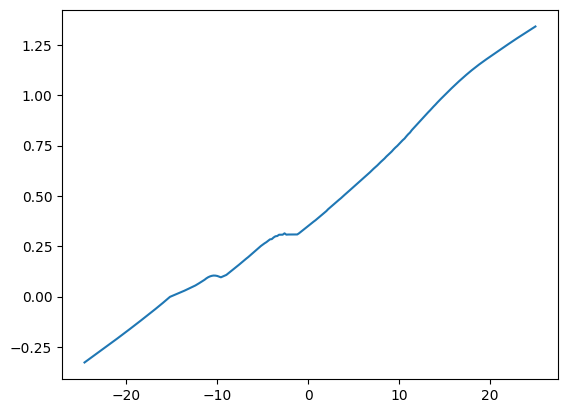

In [32]:
plt.plot(alpha,CM_cg_w)
# plt.vlines(alpha[index_alpha_stall],ymin=0,ymax=1,colors='black')

In [35]:
tail_volume = lt*tail_area/WING_AREA/MEAN_CHORD
tail_volume

0.33428571428571424

In [40]:
iw = 0
it = 0

In [36]:
downwash = 2*CL_w_linear/np.pi/ASPECT_RATIO*180/np.pi
downwash_prime = np.zeros(len(alpha))
downwash_prime[:-1] = downwash[1:]-downwash[:-1]

In [41]:
angle_cl = (downwash[index_alpha_0]+iw-it)
clat = np.nanargmin(alpha-angle_cl)
cl_t_linear[clat]

-2.4028061224489794

In [ ]:
CM_cg_t = -tail_volume * CL_t_linear * tail_efficiency